In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load dataset
df = pd.read_csv('Churn_Modelling.csv')


print(df.head())
print(df.info())
print(df.describe())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

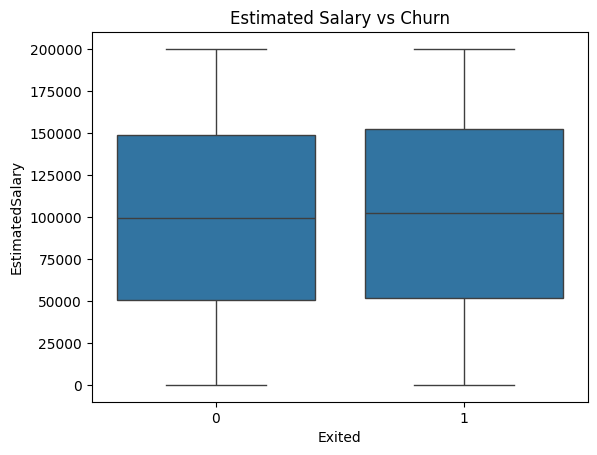

In [3]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Estimated Salary vs Churn')
plt.show()


In [4]:
# Encode Gender
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])


df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [5]:
# Define features and target
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender'] + \
           [col for col in df.columns if col.startswith('Geography_')]

X = df[features]
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[1548   59]
 [ 202  191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Accuracy: 0.8695


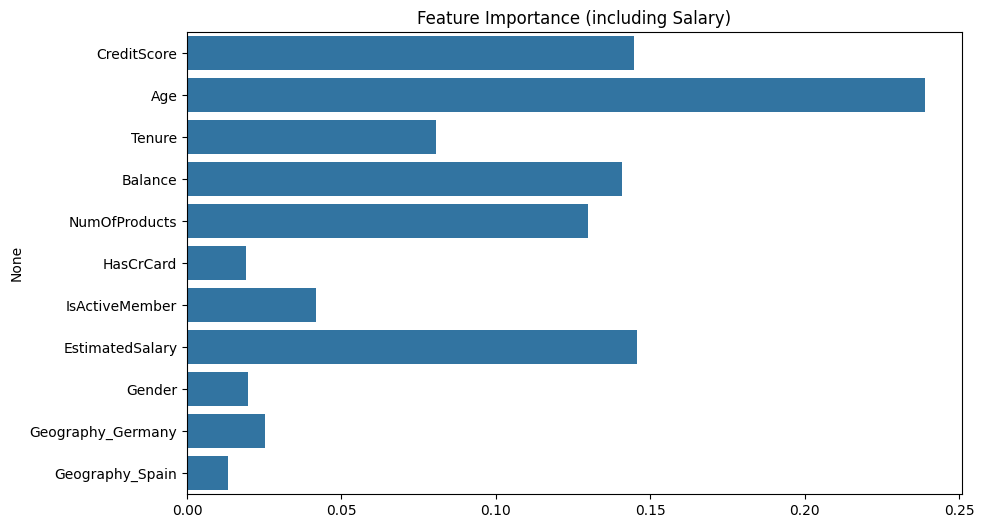

In [9]:
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance (including Salary)')
plt.show()


In [10]:
import joblib


joblib.dump(model, 'churn_model.pkl')


joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


keras_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


keras_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Save as .h5
keras_model.save('churn_model.h5')


e:\Churn modeling Predection\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5631 - loss: 0.7054 - val_accuracy: 0.8062 - val_loss: 0.5045
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8058 - loss: 0.4842 - val_accuracy: 0.8131 - val_loss: 0.4384
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8072 - loss: 0.4473 - val_accuracy: 0.8269 - val_loss: 0.4135
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8171 - loss: 0.4215 - val_accuracy: 0.8363 - val_loss: 0.3928
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8260 - loss: 0.3998 - val_accuracy: 0.8438 - val_loss: 0.3775
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8363 - loss: 0.3863 - val_accuracy: 0.8475 - val_loss: 0.3677
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8473 - loss: 0.3723 - val_accuracy: 0.8531 - val_loss: 0.3616
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8613 - loss: 0.3417 - val_accuracy: 